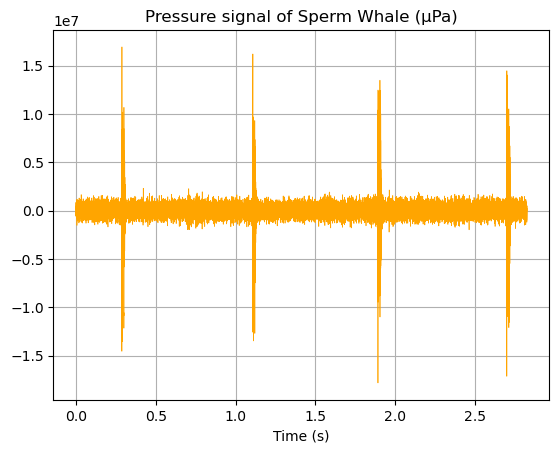

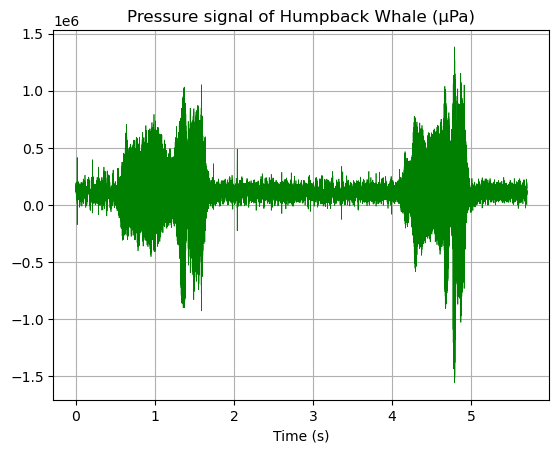

In [2]:
#3.1
#Conversion of 2 Voltage Signals to Pressure Signals

import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import librosa 


#Loading the two Voltage signals
#Διαπιστωσαμε οτι fs1=fs2=2050Hz=fs
#Sperm Whale
y1,fs = librosa.load("85005006.wav")

#Humpback Whale
y2,fs = librosa.load("9220100Q.wav")


#Gain factor of hydraphone
GF = 0.16

#Sensitivity of hydraphone
sensitivity = -155
#Pressure signal of Sperm Whale (μPa)
p1 = (3.5 * y1 * GF)/(10**(sensitivity/20))

#Pressure signal of Humpback Whale (μPa)
p2 = (3.5 * y2 * GF)/(10**(sensitivity/20))


#Plotting Pressure signal of Sperm Whale
plt.figure()
t1=np.linspace(0,len(p1)/fs,len(p1))
plt.plot(t1,p1,color='orange',linewidth=0.5)
plt.xlabel("Time (s)")
plt.title("Pressure signal of Sperm Whale (μPa)")
plt.grid(True)

#Plotting Pressure signal of Humpback Whale
plt.figure()
t2=np.linspace(0,len(p2)/fs,len(p2))
plt.plot(t2,p2,color='green',linewidth=0.5)
plt.xlabel("Time (s)")
plt.title("Pressure signal of Humpback Whale (μPa)")
plt.grid(True)








In [3]:
#3.2
#RMS value of the Pressure and Sound Pressure Level

#RMS
#Sperm Whale
N1 = len(p1)
p1_sqr = p1**2
sum1 = np.sum(p1_sqr[1:N1])
RMS1 = np.sqrt((1/N1)*sum1)
print(f"RMS of Sperm Whale signal is RMS1 = {RMS1} .")

#Humpback Whale
N2 = len(p2)
p2_sqr = p2**2
sum2 = np.sum(p2_sqr[1:N2])
RMS2 = np.sqrt((1/N2)*sum2)
print(f"RMS of Humpback Whale signal is RMS1 = {RMS2} .")

#SPL
pref = 1
#Sperm Whale
SPL1 = 20*(np.log10(RMS1/pref))
print(f"SPL of Sperm Whale signal is SPL1 = {SPL1} dB relative to 1 μPa .")
#Humpback Whale
SPL2 = 20*(np.log10(RMS2/pref))
print(f"SPL of Humpback Whale signal is SPL2 = {SPL2} dB relative to 1 μPa .")







RMS of Sperm Whale signal is RMS1 = 749840.3376660865 .
RMS of Humpback Whale signal is RMS1 = 195774.37361509659 .
SPL of Sperm Whale signal is SPL1 = 117.49937599177156 dB relative to 1 μPa .
SPL of Humpback Whale signal is SPL2 = 105.83511686211784 dB relative to 1 μPa .


Energy in time domain is 35043394 .
Energy in frequency domain is 35043447 .


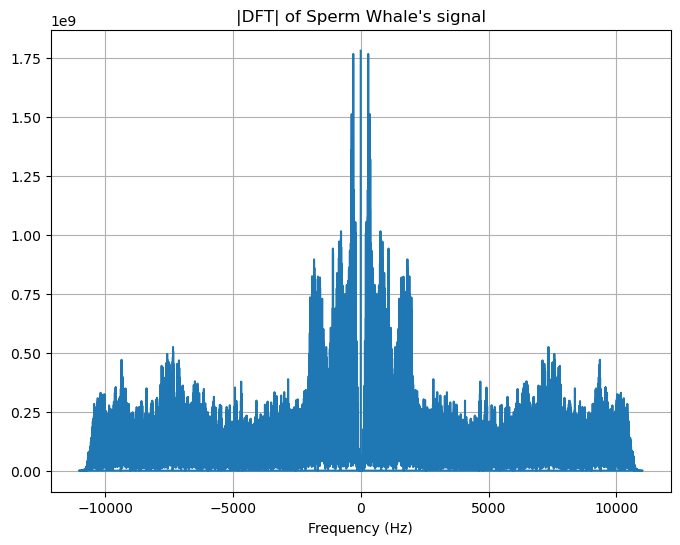

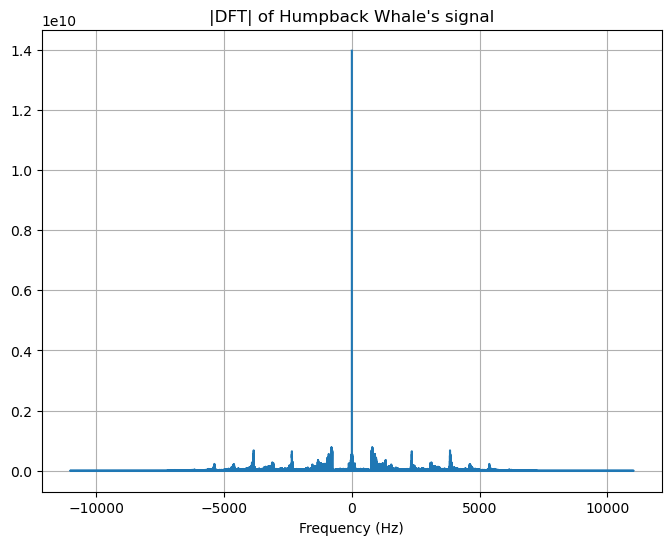

In [4]:
#3.3
#Parseval for signal p2 -Sperm Whale 

#Firstly DFT of p2 (and p1 for plotting )
DFT2 = np.fft.fft(p2)
DFT1 = np.fft.fft(p1)
#Energy in Time Domain
Τ1 = len(p1)
Energy_time = np.sum( (abs(p1))[0:(Τ1-1)]**2 )

#Energy in Frequency Domain
Ν1 = len(DFT1)
Energy_freq = 1/Ν1*(np.sum( (abs(DFT1))[0:(Ν1-1)]**2 ))

#Normalisation
Energy_time_norm = Energy_time/10**6
Energy_time_norm = str(Energy_time_norm)[:8]
Energy_freq_norm = Energy_freq/10**6
Energy_freq_norm = str(Energy_freq_norm)[:8]

print(f"Energy in time domain is {Energy_time_norm} .")
print(f"Energy in frequency domain is {Energy_freq_norm} .")

#Plotting DFT's of two sounds
#Sperm Whale
f1 = np.fft.fftfreq(len(DFT1),1/fs)
plt.figure(figsize=(8,6))
plt.plot(f1,abs(DFT1))
plt.xlabel("Frequency (Hz)")
plt.title("|DFT| of Sperm Whale's signal")
plt.grid(True)

#Humpback Whale
f2 = np.fft.fftfreq(len(DFT2),1/fs)
plt.figure(figsize=(8,6))
plt.plot(f2,abs(DFT2))
plt.xlabel("Frequency (Hz)")
plt.title("|DFT| of Humpback Whale's signal")
plt.grid(True)



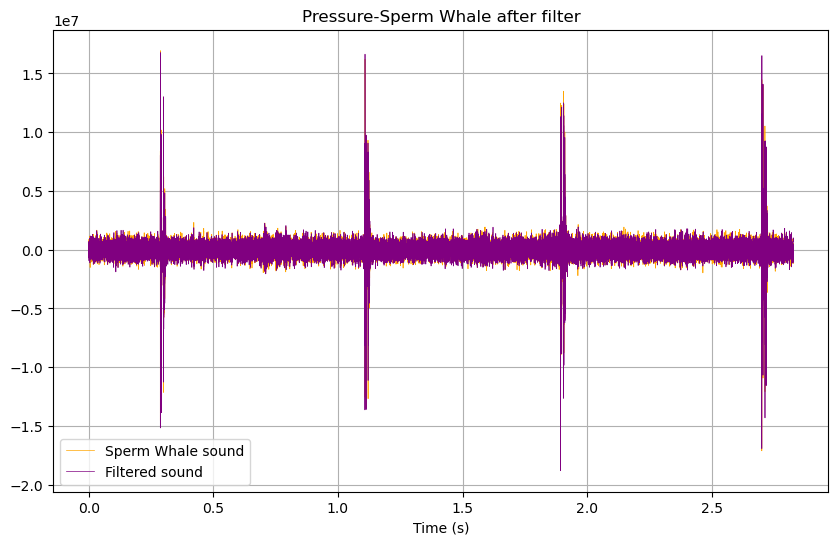

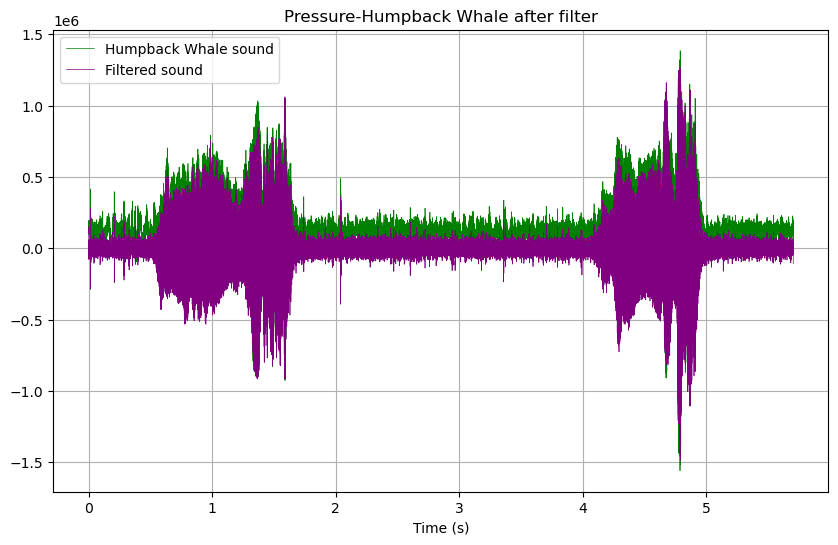

In [5]:
#3.4
#Filtering the two pressure signals

#Butterworth filter
N = 3
Wn= 200 / (fs / 2)
b, a = sp.signal.butter(N,Wn,btype ='high') 


#Filtering p1 (Sperm Whale) 
filtered_p1 = sp.signal.lfilter(b,a,p1)

#Filtering p2 (Humpback Whale)
filtered_p2 = sp.signal.lfilter(b,a,p2)

#Plotting filtered_p1-time and p1-time -> Sperm Whale
#Before filter
plt.figure(figsize=(10, 6))
t1 = np.linspace(0,len(p1)/fs,len(p1))
plt.plot(t1,p1,color='orange',label='Sperm Whale sound',linewidth=0.5)
plt.xlabel("Time (s)")
plt.title("Pressure-Sperm Whale before filter")
plt.grid(True)
#Filtered
plt.plot(t1,filtered_p1,label='Filtered sound',color='Purple',linewidth=0.5)
plt.xlabel("Time (s)")
plt.title("Pressure-Sperm Whale after filter")
plt.grid(True)
plt.legend()


#Plotting filtered_p2-time and p2-time -> Humpback Whale
#Before filter
t2 = np.linspace(0,len(p2)/fs,len(p2))
plt.figure(figsize=(10, 6))
plt.plot(t2,p2,color='green',label='Humpback Whale sound',linewidth=0.5)
plt.xlabel("Time (s)")
plt.title("Pressure-Humpback Whale before filter")
plt.grid(True)
#Filtered
plt.plot(t2,filtered_p2,color='Purple',label='Filtered sound',linewidth=0.5)
plt.xlabel("Time (s)")
plt.title("Pressure-Humpback Whale after filter")
plt.grid(True)
plt.legend()



Sampling rate of Pile Driving signal is fs3 = 22050
Sperm Whale: Sound Pressure Level of Pile Driving sound is SPL3_sperm= 165.15296950722166 dB .
Humpback Whale(Filtered Pile Driving): Sound Pressure Level of Pile Driving sound is SPL3_hump = 141.51802420615306 dB .


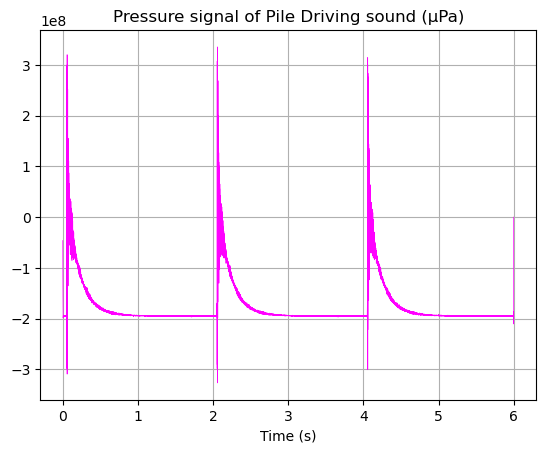

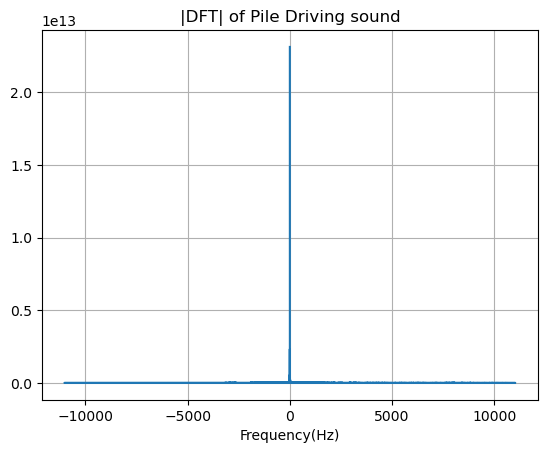

In [6]:
#3.5
#Ανθρωπογενής ήχος - Pile Driving sound

#Loading the  Pile Driving sound
y3,fs3 = librosa.load("Pile driving.wav")
print(f"Sampling rate of Pile Driving signal is fs3 = {fs3}")
#Gain factor of hydraphone
GF = 0.16

#Sensitivity of hydraphone
sensitivity3 = -175

#Pressure signal of the  Pile Driving sound (Pa)
p3 = (3.5 * y3 * GF)/(10**(sensitivity3/20))


#Plotting Pressure signal of the Pile Driving sound 
plt.figure()
t3=np.linspace(0,len(p3)/fs3,len(p3))
plt.plot(t3,p3,color='magenta',linewidth=0.5)
plt.xlabel("Time (s)")
plt.title("Pressure signal of Pile Driving sound (μPa)")
plt.grid(True)

#Plotting the DFT of Pile Driving sound
DFT3=np.fft.fft(p3)
plt.figure()
f3 = np.fft.fftfreq(len(DFT3),1/fs3)
plt.plot(f3,abs(DFT3))
plt.xlabel("Frequency(Hz)")
plt.title("|DFT| of Pile Driving sound")
plt.grid(True)

#Calculating RMS and SPL of Pile Driving sound - Sperm Whale check(ΟΛΟ ΤΟ ΦΑΣΜΑ ΑΡΑ ΧΩΡΙΣ ΦΙΛΤΡΟ) 
#RMS_sperm
N_sperm = len(p3)
p3_sqr = p3**2
sum3 = np.sum(p3_sqr[1:N_sperm])
RMS_sperm = np.sqrt((1/N_sperm)*sum3)
#SPL
pref=1
#Sperm Whale SPL check
SPL3_sperm = 20*(np.log10(RMS_sperm/pref))
print(f"Sperm Whale: Sound Pressure Level of Pile Driving sound is SPL3_sperm= {SPL3_sperm} dB .")


#To check for Humpback Whales we will filter the signal of Pile Driving between 300Hz-3kHz
#Butterworth filter
N = 3
Wn= [300/(fs3/2),3000/(fs3/2)] 
b, a = filt = sp.signal.butter(N,Wn,btype ='band') 

#Filtering p3 (Pile driving)
filtered_p3 = sp.signal.lfilter(b,a,p3)

#Humpback Whale SPL check
#RMS_hump
N_hump = len(filtered_p3)
filtered_p3_sqr = filtered_p3**2
sum3 = np.sum(filtered_p3_sqr[1:N_hump])
RMS_hump = np.sqrt((1/N_hump)*sum3)
#SPL
pref=1
SPL3_hump = 20*(np.log10(RMS_hump/pref))
print(f"Humpback Whale(Filtered Pile Driving): Sound Pressure Level of Pile Driving sound is SPL3_hump = {SPL3_hump} dB .")





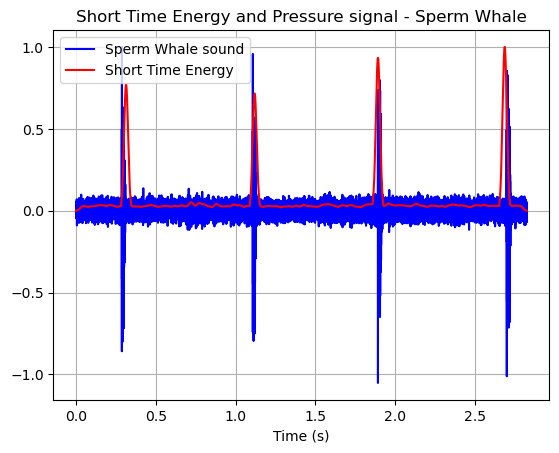

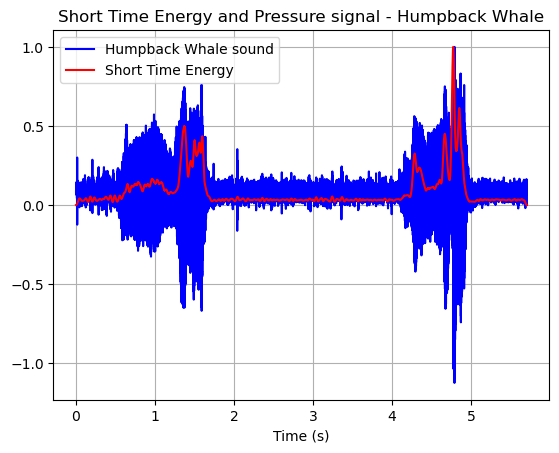

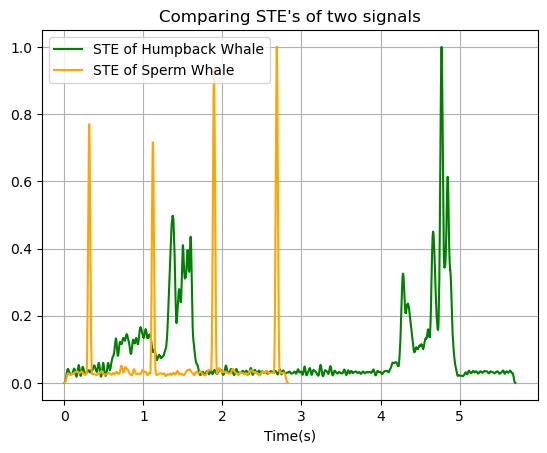

In [7]:
#3.6
#Short Time Energy of Sperm Whale sound (p1) Humpback Whale sound (p2)
from scipy.signal import convolve

#Hamming window 
L = 1102
hamming =np.hamming(L)

#Short Time Energy 
#Sperm Whale sound
p1_sqr = (abs(p1))**2
En1 = convolve(p1_sqr,hamming)
#Humpback Whale sound
p2_sqr = (abs(p2))**2
En2 = convolve(p2_sqr,hamming)

#Normalisations for more distinguisable graph
p1_norm = p1/np.max(p1)
En1 = En1/np.max(En1)
p2_norm = p2/np.max(p2)
En2 = En2/np.max(En2)

#Plotting
#Sperm Whale
plt.figure()
t1=np.linspace(0,len(p1)/fs,len(p1))
time1 = np.linspace(0,len(p1)/fs,len(En1)) 
plt.plot(t1,p1_norm,label='Sperm Whale sound',color='blue')
plt.plot(time1,En1,label='Short Time Energy',color='red')
plt.xlabel("Time (s)")
plt.title("Short Time Energy and Pressure signal - Sperm Whale")
plt.grid(True)
plt.legend()

#Humpback Whale
plt.figure()
t2=np.linspace(0,len(p2)/fs,len(p2))
time2 = np.linspace(0,len(p2)/fs,len(En2)) 
plt.plot(t2,p2_norm,label='Humpback Whale sound',color='blue')
plt.plot(time2,En2,label='Short Time Energy',color='red')
plt.xlabel("Time (s)")
plt.title("Short Time Energy and Pressure signal - Humpback Whale")
plt.grid(True)
plt.legend()

#Comparing the Short Time Energy of both signals
plt.figure()
plt.plot(time2,En2,label='STE of Humpback Whale',color='green')
plt.plot(time1,En1,label='STE of Sperm Whale',color='orange')
plt.xlabel("Time(s)")
plt.title("Comparing STE's of two signals")
plt.legend()
plt.grid(True)


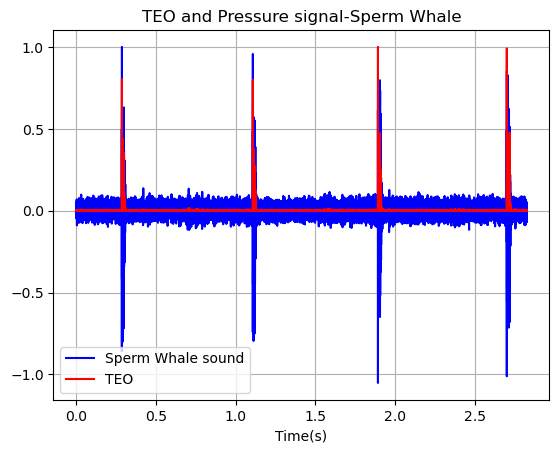

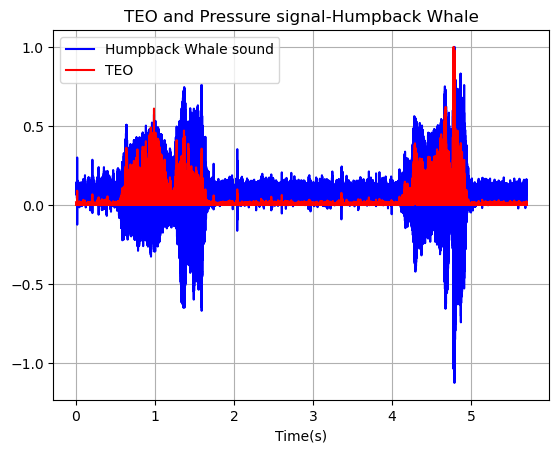

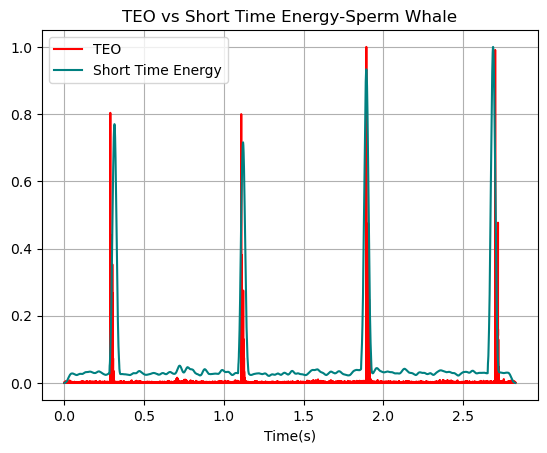

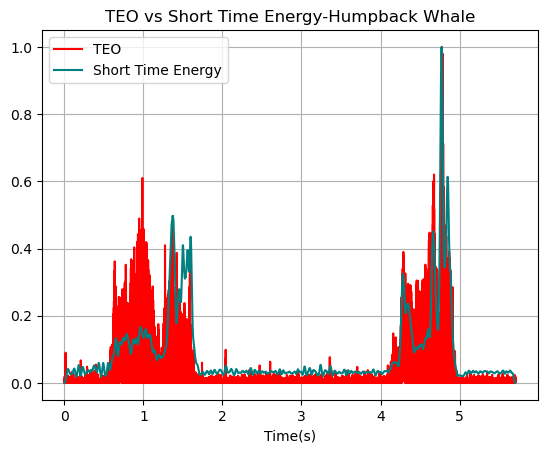

In [8]:
#3.7

#Teager Kaiser Operator function
def Teager_Energy(X):
    X_sqr = X**2
    X_shift_right = np.roll(X,1) #Circular shift right -> X[n − 1]
    X_shift_left = np.roll(X,-1) #Circular shift left -> X[n + 1]
    TEO = X_sqr -  X_shift_right*X_shift_left

    return TEO

#TEO of each pressure signal
TEO1 = Teager_Energy(p1) 
TEO2 = Teager_Energy(p2) 

#Normalisation
p1_norm = p1/np.max(p1)
TEO1 = TEO1/np.max(TEO1)
p2_norm = p2/np.max(p2)
TEO2 = TEO2/np.max(TEO2)

#Plotting
#Sperm Whale
time3 = np.linspace(0,len(p1)/fs,len(TEO1))
plt.figure()
plt.plot(t1,p1_norm,label='Sperm Whale sound',color='blue')
plt.plot(time3,abs(TEO1),label='TEO',color='red')
plt.xlabel("Time(s)")
plt.title("TEO and Pressure signal-Sperm Whale")
plt.grid(True)
plt.legend()

#Humpback Whale 
time4 = np.linspace(0,len(p2)/fs,len(TEO2))
plt.figure()
plt.plot(t2,p2_norm,label='Humpback Whale sound',color='blue')
plt.plot(time4,abs(TEO2),label='TEO',color='red')
plt.xlabel("Time(s)")
plt.title("TEO and Pressure signal-Humpback Whale")
plt.grid(True)
plt.legend()

#Plotting TEO and Short Time Energy in the same plot - Sperm Whale
plt.figure()
time1 = np.linspace(0,len(p1)/fs,len(En1)) 
plt.plot(time3,abs(TEO1),label='TEO',color='red')
plt.plot(time1,En1,label='Short Time Energy',color = 'Teal')
plt.xlabel("Time(s)")
plt.title("TEO vs Short Time Energy-Sperm Whale")
plt.legend()
plt.grid(True)

#Plotting TEO and Short Time Energy in the same plot - Humpback Whale
plt.figure()
time2 = np.linspace(0,len(p2)/fs,len(En2)) 
plt.plot(time4,abs(TEO2),label='TEO',color='red')
plt.plot(time2,En2,label='Short Time Energy',color = 'Teal')
plt.xlabel("Time(s)")
plt.title("TEO vs Short Time Energy-Humpback Whale")
plt.legend()
plt.grid(True)


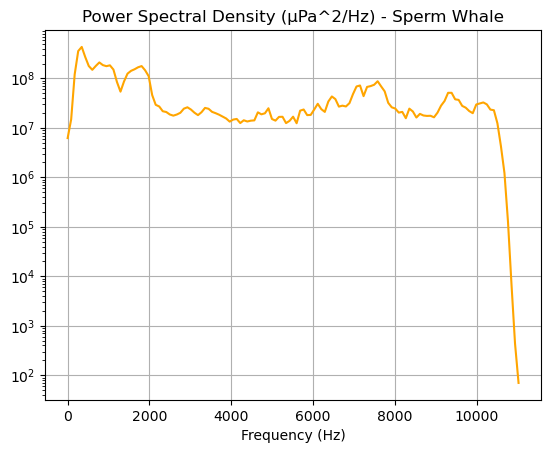

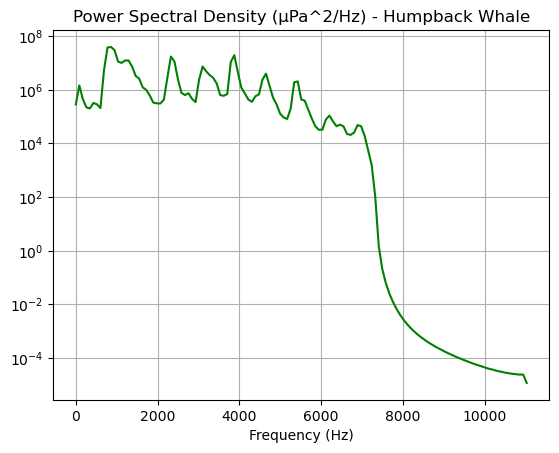

In [9]:
#3.8
#Welch estimator

#Sperm Whale
freq1,PSD1 = sp.signal.welch(p1, fs, window='hann')
#Plotting
plt.figure()
plt.semilogy(freq1,PSD1,color='orange')
plt.xlabel("Frequency (Hz)")
plt.title("Power Spectral Density (μPa^2/Hz) - Sperm Whale")
plt.grid(True)

#Humpback Whale
freq2,PSD2 = sp.signal.welch(p2, fs, window='hann')
#Plotting
plt.figure()
plt.semilogy(freq2,PSD2,color='green')
plt.xlabel("Frequency (Hz)")
plt.title("Power Spectral Density (μPa^2/Hz) - Humpback Whale")
plt.grid(True)


#Sperm : Πολλές κορυφές μεταξύ 0-9kHz άρα εκεί έχει σημαντική ενέργεια του σήματος
#Humpback : Πολλές κορυφές μεταξύ 0-6kHz άρα εκεί έχει σημαντική ενέργεια του σήματος
#Στην sperm έχουμε μεγαλύτερεσ τιμές από την humpback άρα και μεγαλύτερη ενέργεια όπως ήταν και αναμενόμενο

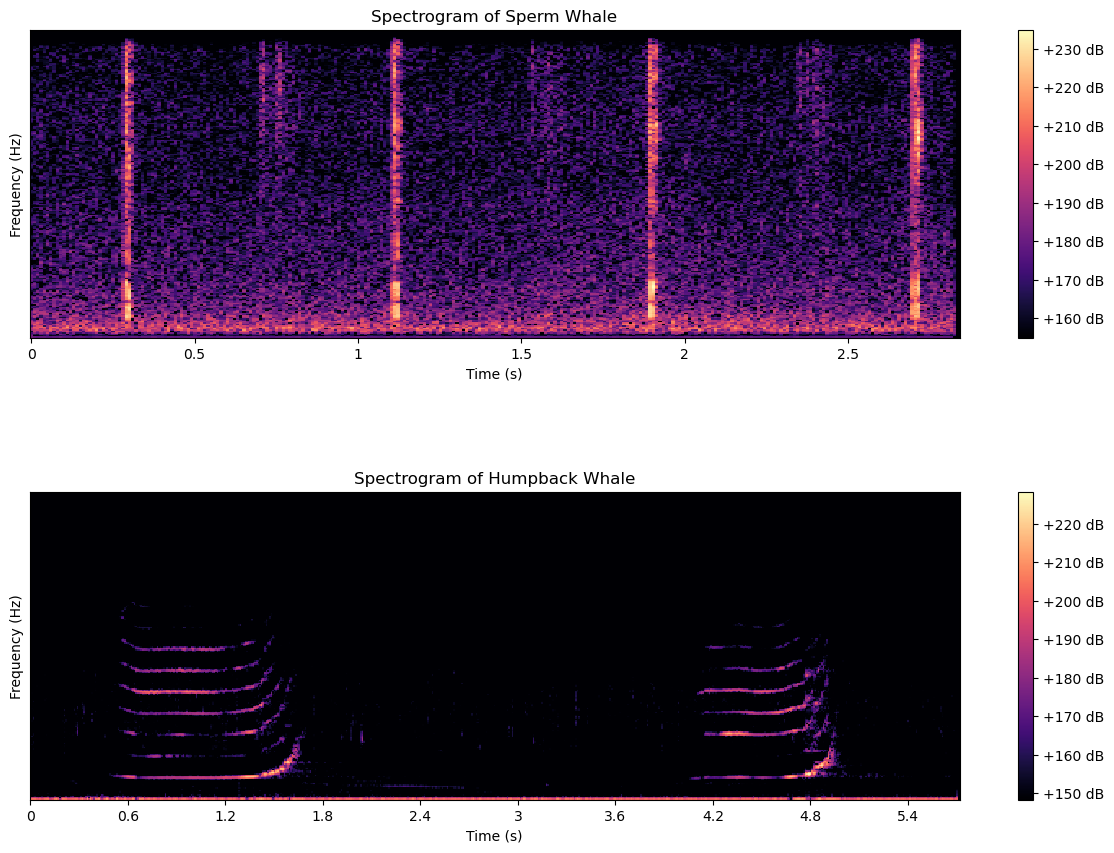

In [10]:
#3.9
import librosa.display


#STFT 
L = int(0.02*fs)
fs_S,times_S,STFT1 = sp.signal.stft(p1,fs,window='hamming',nperseg=L) #Sperm Whale
fs_H,times_H,STFT2 = sp.signal.stft(p2,fs,window='hamming',nperseg=L) #Humpback Whale

STFT1_dB = librosa.amplitude_to_db((abs(STFT1))**2)
STFT2_dB = librosa.amplitude_to_db((abs(STFT2))**2)

#Spectrogram of Sperm Whale sound
plt.figure(figsize=(15,10))
plt.subplot(2, 1, 1)  # Create subplot 1 for the first spectrogram
librosa.display.specshow(STFT1_dB, sr=fs, x_axis='time', x_coords=times_S)
plt.title('Spectrogram of Sperm Whale')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(format='%+2.0f dB')

#Spectrogram of Humpback Whale sound
plt.subplot(2, 1, 2)  # Create subplot 2 for the second spectrogram
librosa.display.specshow(STFT2_dB, sr=fs, x_axis='time', x_coords=times_H)
plt.title('Spectrogram of Humpback Whale')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(format='%+2.0f dB')

plt.subplots_adjust(hspace=0.5)


Text(0.5, 1.0, 'MEL-Spectrogram of Humpback Whale after PCEN')

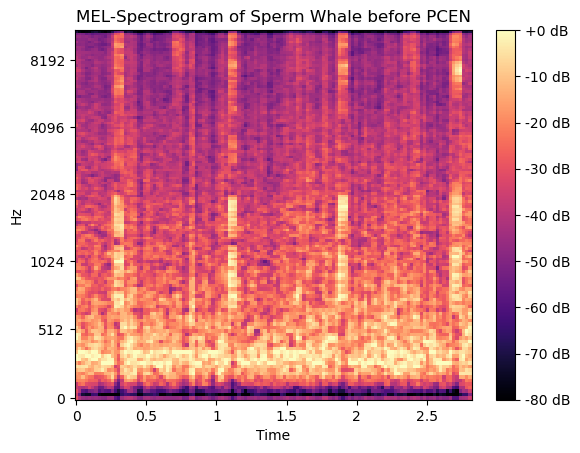

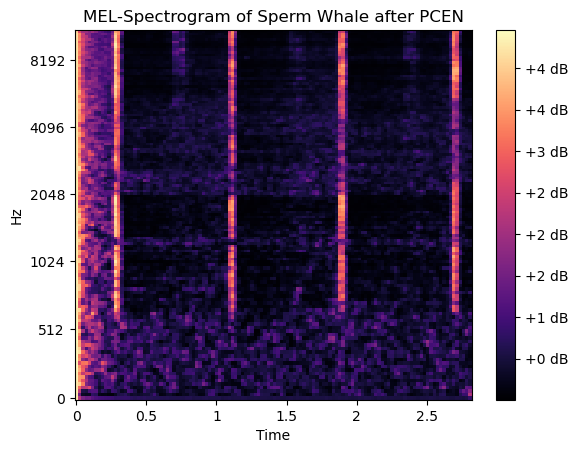

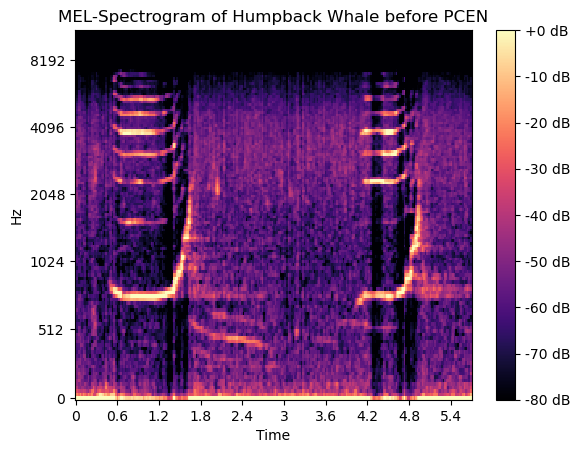

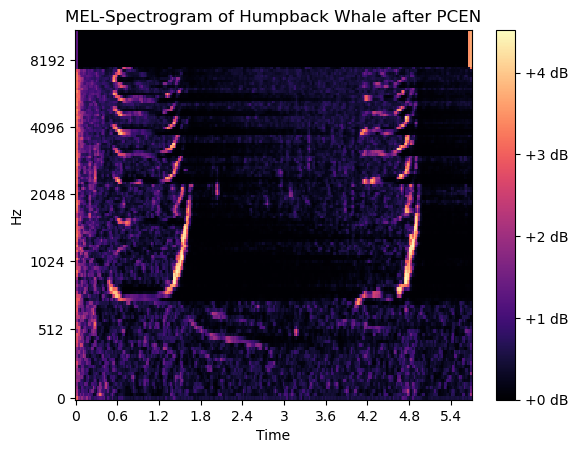

In [67]:
#3.10
#MEL SPECTROGRAM - PCEN 


#MEL Spectrogram - Sperm Whale
#p1_normalized = librosa.util.normalize(p1)
mel1 = librosa.feature.melspectrogram(y=p1 , sr=fs)
mel1_normalized = librosa.util.normalize(mel1)
#Convert to dB
mel1_dB = librosa.amplitude_to_db(mel1_normalized)
#PCEN
pcen1 = librosa.pcen(mel1)

#Plotting
#Before PCEN
plt.figure()
librosa.display.specshow(mel1_dB, sr=fs, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("MEL-Spectrogram of Sperm Whale before PCEN")
#After PCEN
plt.figure()
librosa.display.specshow(pcen1, sr=fs, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("MEL-Spectrogram of Sperm Whale after PCEN")

#MEL Spectrogram - Humpback Whale
mel2 = librosa.feature.melspectrogram(y=p2, sr=fs)
mel2_normalized = librosa.util.normalize(mel2)
#Convert to dB
mel2_dB = librosa.amplitude_to_db(mel2_normalized)
#PCEN
pcen2 = librosa.pcen(mel2)

#Plotting
#Before PCEN
plt.figure()
librosa.display.specshow(mel2_dB, sr=fs, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("MEL-Spectrogram of Humpback Whale before PCEN")
#After PCEN
plt.figure()
librosa.display.specshow(pcen2, sr=fs, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("MEL-Spectrogram of Humpback Whale after PCEN")

